In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [3]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.inceptionV3 import inceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [4]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Cotton Disease/train'
valid_path = 'Cotton Disease/test'

In [5]:
# Import the inceptionV3 library as shown below and add preprocessing layer to the front of inceptionV3
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [6]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [7]:
# useful for getting number of output classes
folders = glob('Cotton Disease/train/*')

In [8]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [10]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [11]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [12]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Cotton Disease/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [14]:
test_set = test_datagen.flow_from_directory('Cotton Disease/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 106 images belonging to 4 classes.


In [15]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\Home\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
61/61 [==============================] - 183s 3s/step - loss: 2.8889 - accuracy: 0.6502 - val_loss: 0.4710 - val_accuracy: 0.9057
Epoch 2/20
61/61 [==============================] - 182s 3s/step - loss: 0.7372 - accuracy: 0.8577 - val_loss: 0.6855 - val_accuracy: 0.8774
Epoch 3/20
61/61 [==============================] - 171s 3s/step - loss: 0.7907 - accuracy: 0.8818 - val_loss: 0.3304 - val_accuracy: 0.9340
Epoch 4/20
61/61 [==============================] - 174s 3s/step - loss: 0.5654 - accuracy: 0.9073 - val_loss: 1.1946 - val_accuracy: 0.8585
Epoch 5/20
61/61 [==============================] - 185s 3s/step - loss: 0.5481 - accuracy: 0.9171 - val_loss: 0.3760 - val_accuracy: 0.9151
Epoch 6/20
61/61 [==============================] - 171s 3s/step - loss: 0.5135 - accuracy: 0.9276 - val_loss: 0.2848 - val_accuracy: 0.9528
Epoch 7/20
61/61 [==============================] - 177s 3s/step - loss: 0.4634 - accuracy: 0.9298 - val_loss: 0.3901 - val_accuracy: 0.9434
Epoch 8/20
61

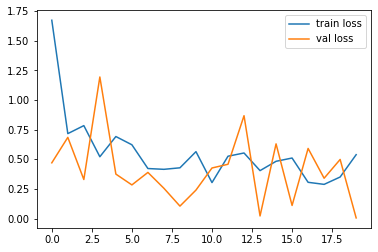

<Figure size 432x288 with 0 Axes>

In [17]:
import matplotlib.pyplot as plt

# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')



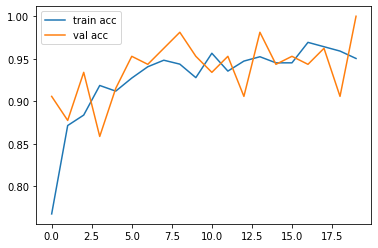

<Figure size 432x288 with 0 Axes>

In [18]:
# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [19]:
from tensorflow.keras.models import load_model

model.save('cottoninception.h5')

In [20]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

model=load_model('cottoninception.h5')


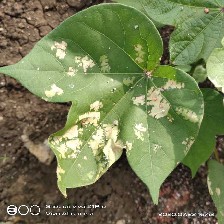

In [44]:
img=image.load_img('Cotton Disease/test/diseased cotton leaf/dis_leaf (206)_iaip.jpg',target_size=(224,224))
img

In [45]:
x=image.img_to_array(img)
x


array([[[ 21.,  20.,  15.],
        [ 31.,  27.,  18.],
        [ 59.,  46.,  30.],
        ...,
        [113., 152., 105.],
        [126., 168., 120.],
        [127., 162., 120.]],

       [[ 32.,  29.,  22.],
        [ 65.,  59.,  47.],
        [124., 111.,  95.],
        ...,
        [124., 162., 115.],
        [128., 167., 122.],
        [138., 170., 129.]],

       [[ 55.,  47.,  36.],
        [ 73.,  63.,  51.],
        [ 98.,  85.,  69.],
        ...,
        [119., 152., 107.],
        [129., 164., 122.],
        [131., 159., 119.]],

       ...,

       [[ 46.,  47.,  31.],
        [ 67.,  66.,  48.],
        [ 90.,  85.,  66.],
        ...,
        [120., 137.,  82.],
        [118., 135.,  80.],
        [118., 135.,  80.]],

       [[110., 113.,  96.],
        [125., 126., 108.],
        [143., 140., 121.],
        ...,
        [114., 131.,  76.],
        [122., 139.,  84.],
        [124., 141.,  86.]],

       [[150., 147., 128.],
        [157., 152., 132.],
        [178., 1

In [46]:
x.shape

(224, 224, 3)

In [47]:
x=x/255
x

array([[[0.08235294, 0.07843138, 0.05882353],
        [0.12156863, 0.10588235, 0.07058824],
        [0.23137255, 0.18039216, 0.11764706],
        ...,
        [0.44313726, 0.59607846, 0.4117647 ],
        [0.49411765, 0.65882355, 0.47058824],
        [0.49803922, 0.63529414, 0.47058824]],

       [[0.1254902 , 0.11372549, 0.08627451],
        [0.25490198, 0.23137255, 0.18431373],
        [0.4862745 , 0.43529412, 0.37254903],
        ...,
        [0.4862745 , 0.63529414, 0.4509804 ],
        [0.5019608 , 0.654902  , 0.47843137],
        [0.5411765 , 0.6666667 , 0.5058824 ]],

       [[0.21568628, 0.18431373, 0.14117648],
        [0.28627452, 0.24705882, 0.2       ],
        [0.38431373, 0.33333334, 0.27058825],
        ...,
        [0.46666667, 0.59607846, 0.41960785],
        [0.5058824 , 0.6431373 , 0.47843137],
        [0.5137255 , 0.62352943, 0.46666667]],

       ...,

       [[0.18039216, 0.18431373, 0.12156863],
        [0.2627451 , 0.25882354, 0.1882353 ],
        [0.3529412 , 0

In [48]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [49]:
model.predict(img_data)

array([[9.9012345e-01, 2.3524824e-05, 6.2499974e-05, 9.7904550e-03]],
      dtype=float32)

In [50]:
a=np.argmax(model.predict(img_data), axis=1)

In [51]:
a==0  ##diseased

array([ True])